# **Exercise 1:** Scatter Plot Game  
* Randomly generate points on a graph and the player has to input the (x,y) coordinates  
* For added difficulty, make the graph larger  


-----  S C A T T E R   P L O T   G A M E  -----
 


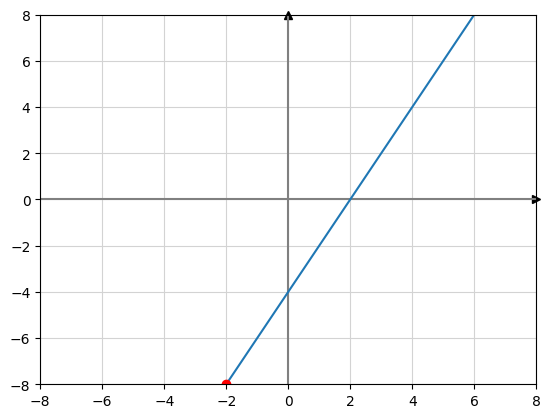

( 1 )
Please enter the coordinates of the red point on the graph
(x- and y-value separated by a comma): -2, -8
(--> actual solution: -2, -8)
 


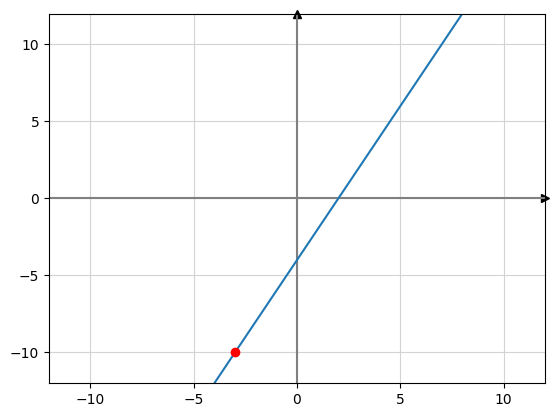

( 2 )
Please enter the coordinates of the red point on the graph
(x- and y-value separated by a comma): -3, -10
(--> actual solution: -3, -10)
 


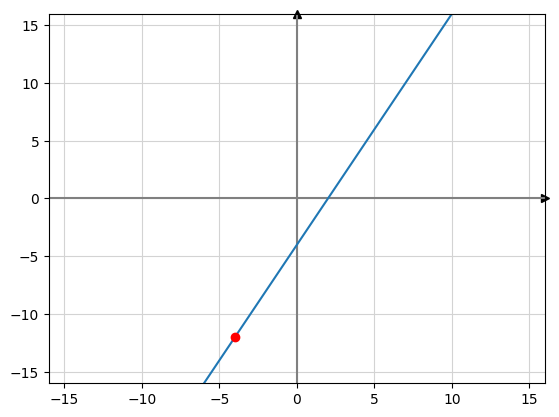

( 3 )
Please enter the coordinates of the red point on the graph
(x- and y-value separated by a comma): -4, -12
(--> actual solution: -4, -12)

===  E V A L U A T I O N  ===
--> Your score: 3/3


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sympy import *

score = 0
tasks = 3
task_nr = 1

xmin = -8
xmax = 8
ymin = -8
ymax = 8
points = 4*(xmax-xmin)

x = symbols("x")
slope = 2
intercept = -4

print("-----  S C A T T E R   P L O T   G A M E  -----")
print("===============================================")

for i in range(0, tasks):
    fig, ax = plt.subplots()
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    plt.axis([xmin,xmax,ymin,ymax])
    plt.plot([xmin,xmax],[0,0],'grey')
    plt.plot([0,0],[ymin,ymax], 'grey')
    graph_x_vals = np.linspace(xmin, xmax, points)
    graph_y_vals = slope * graph_x_vals + intercept
    plt.plot(graph_x_vals, graph_y_vals)

    '''
    tx = 0.25
    ty = ymax-0.5
    ax.text(tx, ty, "y", style="italic")
    tx = xmax-0.5
    ty = 0.25
    ax.text(tx, ty, "x", style="italic")
    '''

    xpoint = random.randint(xmin/4, xmax/4)
    ypoint = slope * xpoint + intercept
    plt.plot(xpoint, ypoint, 'ro')
    print(" ")
    plt.grid(c="lightgrey")
    plt.show(block=False)
    plt.pause(0.01)

    print(f"( {task_nr} )")
    guess = input("Please enter the coordinates of the red point on the graph\n(x- and y-value separated by a comma): ")
    guess_array = guess.split(",")
    xguess = int(guess_array[0])
    yguess = int(guess_array[1])
    if xguess == xpoint and yguess == ypoint:
        score = score + 1
    print(f"(--> actual solution: {xpoint}, {ypoint})")
    xmin -= 4
    xmax += 4
    ymin -= 4
    ymax += 4
    task_nr += 1

print()
print("===  E V A L U A T I O N  ===")
print(f"--> Your score: {score}/{tasks}")


# **Exercise 2:** Algebra Practice Game  
* Generate one-step and two-step problems with random integer values and the player has to input the answer  
* Use positive and negative values. For added difficulty, make the numbers larger


In [2]:
import matplotlib.pyplot as plt
import random
from sympy import *

x, y = symbols("x, y")

guess = 0
score = 0
tasks = 5
task_nr = 1

print("   ALGEBRA PRACTICE GAME")
print("  =======================")

min_nr = -50
max_nr = 50
operations = ["+", "-", "*", "/"]

for i in range(0, tasks):
    # generate randomly chosen numbers (within a defined range of values) and arithmetical operations
    allowed_values = list(range(min_nr//10, (max_nr//10)+1))
    allowed_values.remove(0)
    a = random.choice(allowed_values)           # cf. Martin Thoma's answer to https://stackoverflow.com/questions/29844181/how-do-you-create-a-random-range-but-exclude-a-specific-number
    r = random.randint(min_nr, max_nr)
    operation_1 = random.choice(operations)

    print(f"( {task_nr} )")
    print("# solve the equation: ", end="")

    # create a "one-step problem" (~ only one arithmetic operation)
    if task_nr <= 2:
        print("(one-step problem)")
        equation = f"{a} {operation_1} x - {r}"
        solution = solve(parse_expr(equation), x)
        user_resp = input(f"{a} {operation_1} x = {r}   -->   x = ")
    # create a "two-step problem" (~ two chained arithmetic operations)
    else:
        print("(two-step problem)")
        b = random.choice(allowed_values) * 2
        operation_2 = random.choice(operations)
        equation = f"{a} {operation_1} x {operation_2} {b} - {r}"
        solution = solve(parse_expr(equation), x)
        if b < 0:
            if operation_2 == "/" or operation_2 == "*":
                user_resp = input(f"{a} {operation_1} x {operation_2} ({b}) = {r}   -->   x = ")
            elif operation_2 == "+":
                user_resp = input(f"{a} {operation_1} x - {abs(b)} = {r}   -->   x = ")
            else:
                user_resp = input(f"{a} {operation_1} x + {abs(b)} = {r}   -->   x = ")
        else:
            user_resp = input(f"{a} {operation_1} x {operation_2} {b} = {r}   -->   x = ")

    # process the user's input
    if "/" in user_resp:
        num, den = user_resp.split("/")           # cf. Dave's answer to https://stackoverflow.com/questions/1806278/convert-fraction-to-float
        guess = float(num)/float(den)
    else:
        guess = float(user_resp)

    # evaluate the user's input
    if guess == float(solution[0]):
        score += 1
        r_or_w = "right"
    else:
        r_or_w = "wrong"

    # indicate the actual solution
    print(f"(--> actual solution: {solution[0]} ... you've been {r_or_w}!)")
    print()

    # update/change variables
    task_nr += 1
    if task_nr%2 != 0:
        max_nr *= 10
        min_nr *= 10

# provide a final feedback
print()
print("===  E V A L U A T I O N  ===")
print(f"Your score: {score}/{tasks}")


   ALGEBRA PRACTICE GAME
( 1 )
# solve the equation: (one-step problem)
-2 - x = 14   -->   x = -16
(--> actual solution: -16 ... you've been right!)

( 2 )
# solve the equation: (one-step problem)
-2 - x = 0   -->   x = -2
(--> actual solution: -2 ... you've been right!)

( 3 )
# solve the equation: (two-step problem)
28 + x / (-78) = 104   -->   x = -5928
(--> actual solution: -5928 ... you've been right!)

( 4 )
# solve the equation: (two-step problem)
-20 + x + 42 = 183   -->   x = 161
(--> actual solution: 161 ... you've been right!)

( 5 )
# solve the equation: (two-step problem)
147 / x / 518 = -2157   -->   x = -0.0001315641
(--> actual solution: -7/53206 ... you've been wrong!)


===  E V A L U A T I O N  ===
Your score: 4/5


# **Exercise 3:** Projectile Game  
* Display a "wall" with random height and location. Player has to move sliders to adjust a parabolic path to clear the wall  
* For added difficulty, make a second level where players enter a, b, and c without sliders


### Level 1

In [3]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import random
from sympy import *

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive
drive.mount("/content/drive")


# define a function to scatterplot a rocket image onto the line graph
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = image
    except TypeError:
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords="data", frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


#########################################################################
# provide a short introduction to the game
print()
print("WELCOME TO THE 'MISSILE MOVEMENT' GAME!")
print("=======================================")
print("The aim of this game is simply to determine the parameters of a missile's trajectory so that the missile will clear a wall")
print("placed at a randomly chosen distance of 5 to 30 meters. The wall, that is your target, will be between 5 and 50 meters high.")
print("To keep the game challenging, your missile has to hit the wall directly - it is not sufficient just to bridge the distance to the wall.")
print()
print("INSTRUCTIONS:")
print("The missile's trajectory can be described by a quadratic function of the standard form f(x) = ax\u00B2 + bx + c.")
print("In this equation, 'c' defines the initial height which we might interpret as the height of the missile's launching pad,")
print("'bx' defines (via the product of initial velocity and time) the distance the once accelerated missile will cover, and")
print("'ax\u00B2' defines (via the product of gravitational acceleration and the time squared) the ('falling') distance the missile")
print("will be moved by gravitational force.")
print()
print("With these preliminary considerations in mind, in order to get a realistic modeling of the kinematic problem, you should")
print("set a positive value for 'b', as 'bx' should represent an upward movement, and a negative value for 'a', as 'ax\u00B2' should")
print("represent a movement down to the center of the earth.")
print("(To be more precise: To model the missile's movement under the physical conditions prevailing on earth, 'a' should correspond")
print("to the (standard) gravity of Earth divided by 2, that is about -4.9 m/s\u00B2. Remember the classic formula you have learnt at school")
print("to calculate a projectile's (vertical) motion: y = y\u2080 + v\u2080t - 1/2gt\u00B2 ...)")
print()


height = random.randint(5, 50)
distance = random.randint(5, 30)
print("YOUR CHALLENGE -->")
print(f"- height of the wall: {height}m")
print(f"- distance: {distance}m")
print()

# define a trajectory function the player is expected to explore (by changing the parameters)
# --> f() is called by interact(), s. below
def f(a, b, c):
    # calculate the coordinates of the vertex of the missile's trajectory
    if a == 0:
        vx = 0
    else:
        vx = -b/(2*a)
    vy = a*vx**2 + b*vx + c

    # set the dimensions of the window that is to display the missile's trajectory and the wall
    xmin = -1
    if vx < (0.5*distance):
        xmax = distance + 10
    else:
        xmax = 2*int(vx) + 10
    ymin = -1
    if vy < height:
        ymax = height + 5
    else:
        ymax = int(vy) + 5

    # plot the coordinate system with the missile's trajectory and the wall
    points = 4 * (xmax - xmin)
    x = symbols("x")
    root = float(max(roots(a*x**2 + b*x + c, x)))
    x_vals = np.linspace(0, root)
    y_vals = a*x_vals**2 + b*x_vals + c

    fig, ax = plt.subplots()
    plt.axis([xmin, xmax, ymin, ymax])
    plt.plot([xmin, xmax], [0, 0], "lightgrey")
    plt.plot([0, 0], [ymin, ymax], "lightgrey")
    plt.plot(x_vals, y_vals, "blue", label="missile")                           # missile's trajectory
    #image = Image.open('sample_data/rocket.png')
    image = Image.open("/content/drive/My Drive/Colab Notebooks/rocket.png")
    scale = 0.08
    image = image.resize((int(image.width * scale), int(image.height * scale)))
    img_x_vals = [x_vals[0], vx, x_vals[-1]]
    img_y_vals = [y_vals[0], vy, y_vals[-1]]
    imscatter(img_x_vals, img_y_vals, image, zoom=0.1, ax=ax)
    ax.plot(x_vals, y_vals)
    wall = plt.plot([distance, distance], [0, height], "brown", label="wall")   # wall (target)
    plt.setp(wall, linewidth=4)
    plt.ylabel("height")
    plt.xlabel("distance")
    plt.legend(loc="upper right")
    plt.show(block=False)
    plt.pause(0.01)

    if (a*distance**2 + b*distance + c) >= 0 and (a*distance**2 + b*distance + c) <= height:
        print("CONGRATULATIONS! - YOU'VE MADE IT!")

# create the interactive plot with 3 sliders
interactive_plot = interact(f, a=(-10, 0), b=(-300, 300), c=(0, 10), continuous_update=False)
interactive_plot


Mounted at /content/drive

WELCOME TO THE 'MISSILE MOVEMENT' GAME!
The aim of this game is simply to determine the parameters of a missile's trajectory so that the missile will clear a wall
placed at a randomly chosen distance of 5 to 30 meters. The wall, that is your target, will be between 5 and 50 meters high.
To keep the game challenging, your missile has to hit the wall directly - it is not sufficient just to bridge the distance to the wall.

INSTRUCTIONS:
The missile's trajectory can be described by a quadratic function of the standard form f(x) = ax² + bx + c.
In this equation, 'c' defines the initial height which we might interpret as the height of the missile's launching pad,
'bx' defines (via the product of initial velocity and time) the distance the once accelerated missile will cover, and
'ax²' defines (via the product of gravitational acceleration and the time squared) the ('falling') distance the missile
will be moved by gravitational force.

With these preliminary consid

interactive(children=(IntSlider(value=-5, description='a', max=0, min=-10), IntSlider(value=0, description='b'…

<function __main__.f(a, b, c)>

### Level 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

WELCOME TO THE 'MISSILE MOVEMENT' GAME!
The aim of this game is simply to determine the parameters of a missile's trajectory so that the missile will clear a wall
placed at a randomly chosen distance of 5 to 30 meters. The wall, that is your target, will be between 5 and 50 meters high.
To keep the game challenging, your missile has to hit the wall directly - it is not sufficient just to bridge the distance to the wall.

INSTRUCTIONS:
The missile's trajectory can be described by a quadratic function of the standard form f(x) = ax² + bx + c.
In this equation, 'c' defines the initial height which we might interpret as the height of the missile's launching pad,
'bx' defines (via the product of initial velocity and time) the distance the once accelerated missile will cover, and
'ax²' defines (via the product of gravitational acceleration and the time squared) th

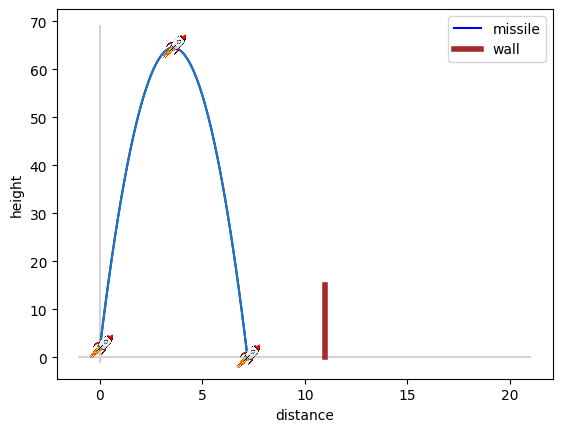

Sorry, your missile didn't hit the target! - Try it again ...
Please enter your parameters for the missile's movement formula below:
(NOTE: Every floating point number you enter will be rounded to two decimal places!)
  - your quadratic coefficient: a = -4.9
  - your linear coefficient: b = 50
  - your constant term: c = 2

--> trajectory of the missile based on your parameters
    (f(x) = -4.9x² + 50x + 2)


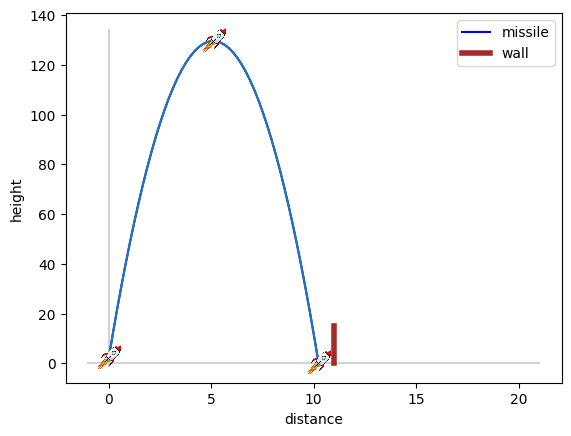

Sorry, your missile didn't hit the target! - Try it again ...
Please enter your parameters for the missile's movement formula below:
(NOTE: Every floating point number you enter will be rounded to two decimal places!)
  - your quadratic coefficient: a = -4.9
  - your linear coefficient: b = 55
  - your constant term: c = 2

--> trajectory of the missile based on your parameters
    (f(x) = -4.9x² + 55x + 2)


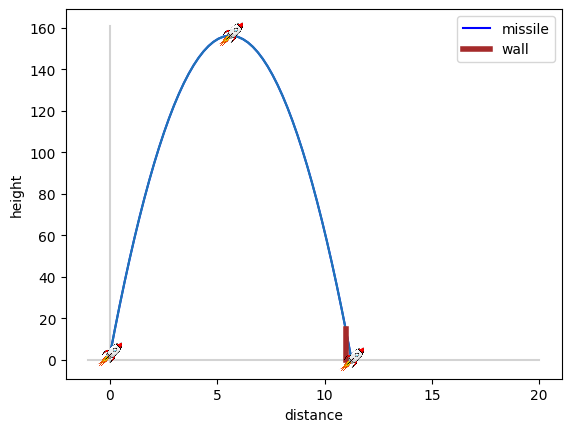

CONGRATULATIONS! - YOU'VE ACTUALLY MADE IT!
*** YOU WIN! ***

Do you want to play again? (Y/N) - N
G O O D B Y E !


In [4]:
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy as np
import random
from sympy import *

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive
drive.mount("/content/drive")


# define a function to scatterplot a rocket image onto the line graph
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = image
    except TypeError:
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords="data", frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


#########################################################################
# provide a short introduction to the game
print()
print("WELCOME TO THE 'MISSILE MOVEMENT' GAME!")
print("=======================================")
print("The aim of this game is simply to determine the parameters of a missile's trajectory so that the missile will clear a wall")
print("placed at a randomly chosen distance of 5 to 30 meters. The wall, that is your target, will be between 5 and 50 meters high.")
print("To keep the game challenging, your missile has to hit the wall directly - it is not sufficient just to bridge the distance to the wall.")
print()
print("INSTRUCTIONS:")
print("The missile's trajectory can be described by a quadratic function of the standard form f(x) = ax\u00B2 + bx + c.")
print("In this equation, 'c' defines the initial height which we might interpret as the height of the missile's launching pad,")
print("'bx' defines (via the product of initial velocity and time) the distance the once accelerated missile will cover, and")
print("'ax\u00B2' defines (via the product of gravitational acceleration and the time squared) the ('falling') distance the missile")
print("will be moved by gravitational force.")
print()
print("With these preliminary considerations in mind, in order to get a realistic modeling of the kinematic problem, you should")
print("enter a positive value for 'b', as 'bx' should represent an upward movement, and a negative value for 'a', as 'ax\u00B2' should")
print("represent a movement down to the center of the earth.")
print("(To be more precise: To model the missile's movement under the physical conditions prevailing on earth, 'a' should correspond")
print("to the (standard) gravity of Earth divided by 2, that is about -4.9 m/s\u00B2. Remember the classic formula you have learnt at school")
print("to calculate a projectile's (vertical) motion: y = y\u2080 + v\u2080t - 1/2gt\u00B2 ...)")
print()

# start a main loop that keeps the game running
game_on = True
while game_on:
    height = random.randint(5, 50)
    distance = random.randint(5, 30)
    print("YOUR CHALLENGE -->")
    print(f"- height of the wall: {height}m")
    print(f"- distance: {distance}m")
    print()

    # (1) prompt the player to enter his parameters for the trajectory function
    guess_successful = False
    attempts = 5
    while not guess_successful and attempts > 0:
        print("Please enter your parameters for the missile's movement formula below:")
        print("(NOTE: Every floating point number you enter will be rounded to two decimal places!)")
        input_valid = False
        while not input_valid:
            try:
                a = round(float(input("  - your quadratic coefficient: a = ")), 2)
                b = round(float(input("  - your linear coefficient: b = ")), 2)
                c = round(float(input("  - your constant term: c = ")), 2)
                input_valid = True
            except ValueError:
                print("# ERROR: You have to enter numerical values here! - Try it again ...")

        # (2) evaluate the player's input
        print()
        print("--> trajectory of the missile based on your parameters")
        print(f"    (f(x) = {a:g}x\u00B2 + {b:g}x + {c:g})")

        # calculate the coordinates of the vertex of the missile's trajectory
        if a == 0:
            vx = 0
        else:
            vx = -b/(2*a)
        vy = a*vx**2 + b*vx + c

        # set the dimensions of the window that is to display the missile's trajectory and the wall
        xmin = -1
        if vx < (0.5*distance):
            xmax = distance + 10
        else:
            xmax = 2*int(vx) + 10
        ymin = -1
        if vy < height:
            ymax = height + 5
        else:
            ymax = int(vy) + 5

        # plot the coordinate system with the missile's trajectory and the wall
        points = 4 * (xmax - xmin)
        x = symbols("x")
        try:
            end_pt = float(max(roots(a*x**2 + b*x + c, x)))
        except:
            end_pt = distance
            ymax = a*distance**2 + b*distance + c
        x_vals = np.linspace(0, end_pt)
        y_vals = a*x_vals**2 + b*x_vals + c

        fig, ax = plt.subplots()
        plt.axis([xmin, xmax, ymin, ymax])
        plt.plot([xmin, xmax], [0, 0], "lightgrey")
        plt.plot([0, 0], [ymin, ymax], "lightgrey")
        plt.plot(x_vals, y_vals, "blue", label="missile")                           # missile's trajectory
        image = Image.open("/content/drive/My Drive/Colab Notebooks/rocket.png")
        scale = 0.08
        image = image.resize((int(image.width * scale), int(image.height * scale)))
        img_x_vals = [x_vals[0], vx, x_vals[-1]]
        img_y_vals = [y_vals[0], vy, y_vals[-1]]
        imscatter(img_x_vals, img_y_vals, image, zoom=0.1, ax=ax)
        ax.plot(x_vals, y_vals)
        wall = plt.plot([distance, distance], [0, height], "brown", label="wall")   # wall (target)
        plt.setp(wall, linewidth=4)
        plt.ylabel("height")
        plt.xlabel("distance")
        plt.legend(loc="upper right")
        plt.show(block=False)
        plt.pause(0.01)

        attempts -= 1
        if (a*distance**2 + b*distance + c) >= 0 and (a*distance**2 + b*distance + c) <= height:
            print("CONGRATULATIONS! - YOU'VE ACTUALLY MADE IT!")
            print("*** YOU WIN! ***")
            guess_successful = True
        else:
            if attempts > 0:
                print("Sorry, your missile didn't hit the target! - Try it again ...")
            else:
                print("Sorry, your missile failed again - and you have no more attempts left!")
                print("*** GAME OVER! YOU LOSE! ***")

    # ask the player if he want's to continue or to quit the game
    print()
    input_valid = False
    while not input_valid:
        choice = input("Do you want to play again? (Y/N) - ")
        choice = choice.upper()
        if choice in ["Y", "N"]:
            input_valid = True
        else:
            print("# ERROR! - You have to enter Y/y or N/n here!")

    if choice == "N":
        print("===============")
        print("G O O D B Y E !")
        game_on = False
